# **Prediction of Insurance Charges**

A Study of Customers Insurance Charges

DataSet: https://www.kaggle.com/datasets/thedevastator/prediction-of-insurance-charges-using-age-gender


# Pre-procesamiento de los datos

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Lectura de la base de datos

In [67]:
df = pd.read_csv("insurance.csv")
df.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [68]:
# Separando la variable dependiente
X = df.drop("charges", axis=1)
y = df[["charges"]]
df.shape

(1338, 8)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


Las variables independientes parecen tener el formato adecuado. Las variables de tipo 'object' deberan ser procesadas para asignarles su tipo categorico.

## Revisar si hay NaNs

In [70]:
import missingno as msno

<Axes: >

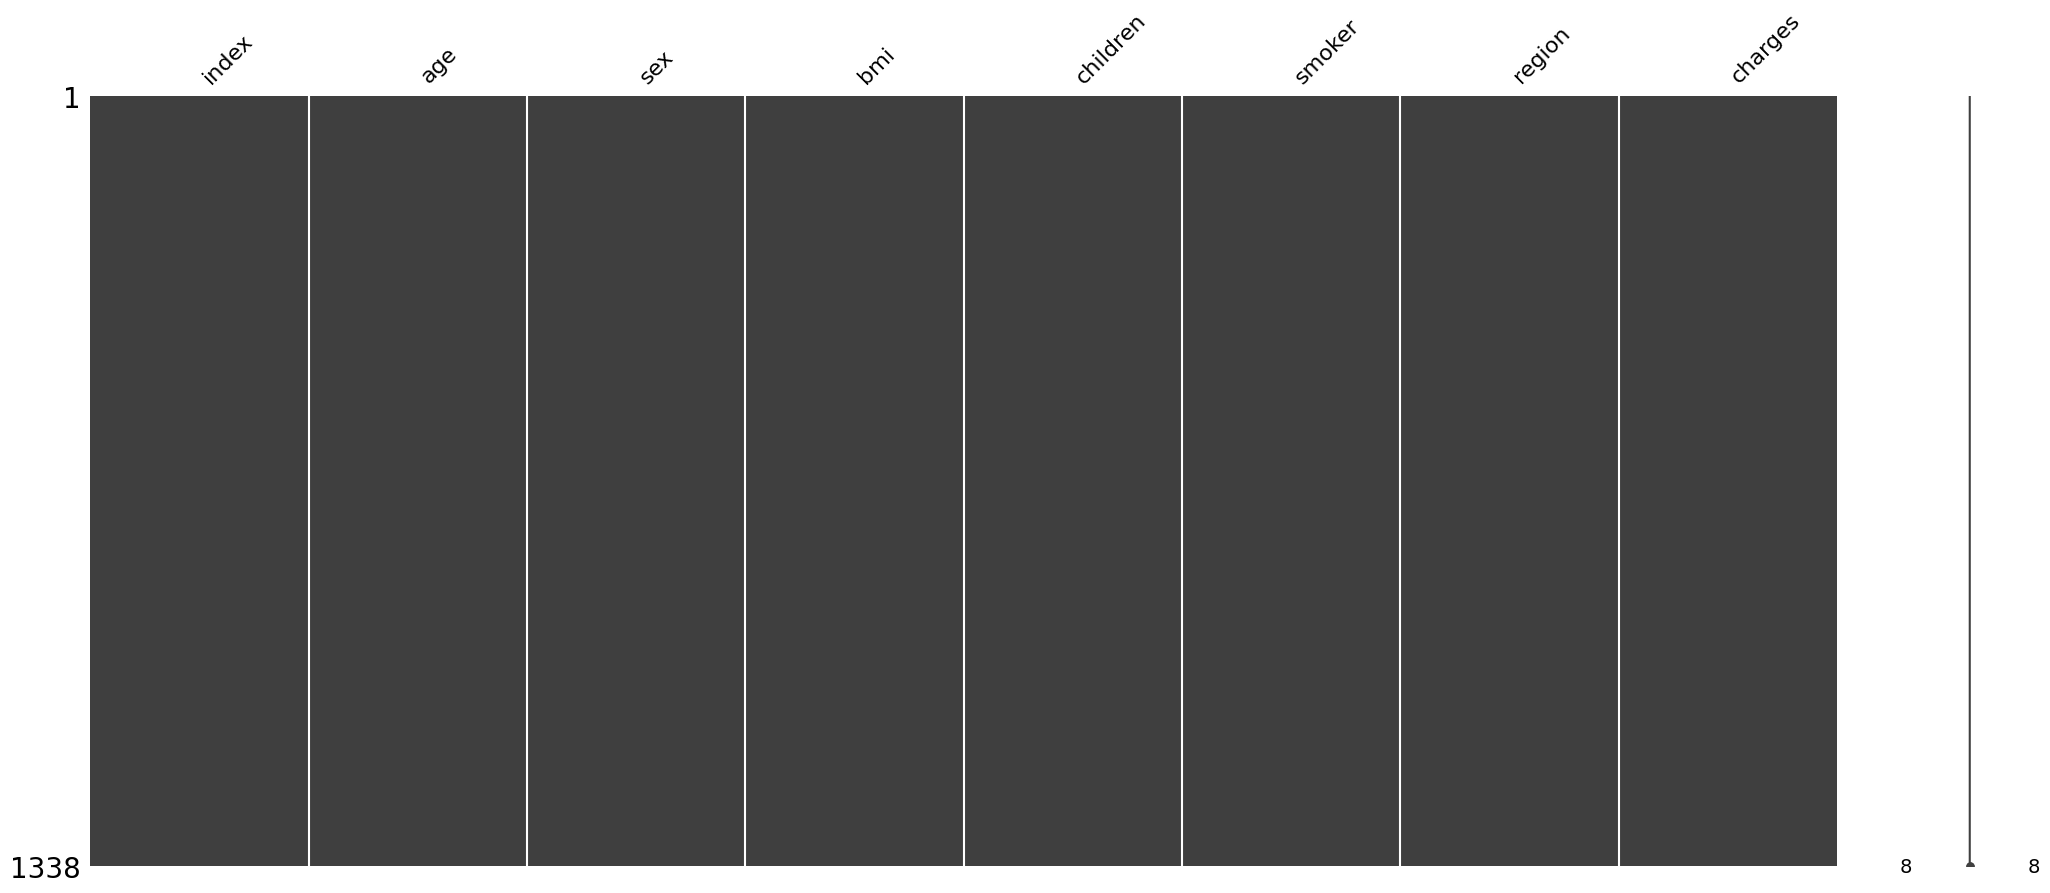

In [71]:
msno.matrix(df)

No se visualizan datos faltantes en nuestro DataSet

## Eliminar columnas irrelevantes

In [72]:
X = X.drop(['index'], axis=1)

## Conversion a formato adecuado

### Columnas numericas

Las columnas numericas ya tienen el formato correcto, no obstante, se realizara el procesamiento solo como ejemplo.

In [73]:
X.age = pd.to_numeric(X['age'], errors='coerce')
X.bmi = pd.to_numeric(X['bmi'], errors='coerce')
X.children = pd.to_numeric(X['children'], errors='coerce')
y.charges = pd.to_numeric(y['charges'], errors='coerce')

<ipython-input-73-b03a9fde1b4d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.charges = pd.to_numeric(y['charges'], errors='coerce')


In [74]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 62.8+ KB


In [75]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   charges  1338 non-null   float64
dtypes: float64(1)
memory usage: 10.6 KB


### Columnas categoricas

### SEX

In [76]:
X[['sex']].value_counts()

sex   
male      676
female    662
dtype: int64

### SMOKER

In [77]:
X[['smoker']].value_counts()

smoker
no        1064
yes        274
dtype: int64

In [78]:
X[['smoker']] = X[['smoker']].astype('category')

In [79]:
X[['smoker']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   smoker  1338 non-null   category
dtypes: category(1)
memory usage: 1.6 KB


### REGION

In [80]:
X[['region']].value_counts()

region   
southeast    364
northwest    325
southwest    325
northeast    324
dtype: int64

In [81]:
X[['region']] = X[['region']].astype('category')

In [82]:
X[['region']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   region  1338 non-null   category
dtypes: category(1)
memory usage: 1.6 KB


### Imputacion de datos

In [83]:
X.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [84]:
y.isna().sum()

charges    0
dtype: int64

Al no haber datos faltantes no es necesario realizar la imputación de datos

# Pre-procesamiento y EDA

## Variables cuantitativas

In [85]:
X.select_dtypes(include=['float', 'int64']).columns

Index(['age', 'bmi', 'children'], dtype='object')

<Axes: >

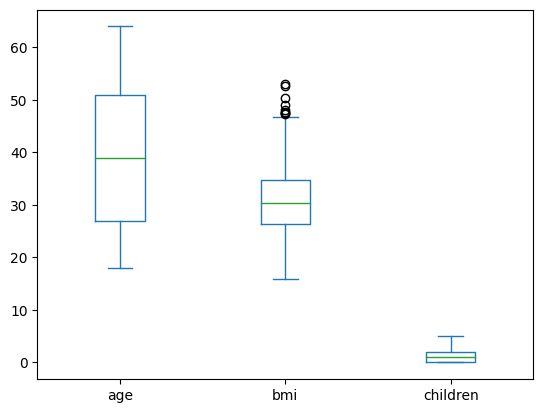

In [86]:
X[['age', 'bmi', 'children']].plot(kind="box")

In [87]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [88]:
scaler_robust = RobustScaler()
scaler_robust.fit(X[['age', 'bmi', 'children']])

RobustScaler()

In [89]:
X_numeric_scaled = scaler_robust.transform(X[['age', 'bmi', 'children']])
X_numeric_scaled

array([[-0.83333333, -0.29770765, -0.5       ],
       [-0.875     ,  0.40130991,  0.        ],
       [-0.45833333,  0.30961596,  1.        ],
       ...,
       [-0.875     ,  0.76808574, -0.5       ],
       [-0.75      , -0.54778208, -0.5       ],
       [ 0.91666667, -0.15838047, -0.5       ]])

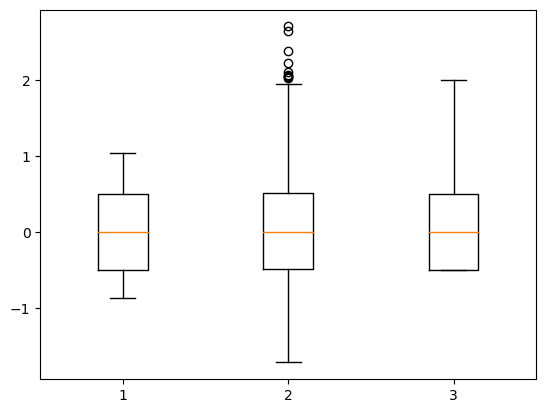

In [90]:
plt.boxplot(X_numeric_scaled)
plt.show()

## Variables categoricas

In [91]:
X.select_dtypes(include=["category","object"]).columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [92]:
for i in X.select_dtypes(include=["category","object"]).columns:
    print(i,"\t", pd.Categorical(X[i]).categories, "\t\t\t\t",pd.Categorical(X[i]).ordered)

sex 	 Index(['female', 'male'], dtype='object') 				 False
smoker 	 Index(['no', 'yes'], dtype='object') 				 False
region 	 Index(['northeast', 'northwest', 'southeast', 'southwest'], dtype='object') 				 False


In [93]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   object  
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
dtypes: category(2), float64(1), int64(2), object(1)
memory usage: 44.9+ KB


### Data ordinal

No hay data del tipo ordinal

### Data nominal

In [94]:
from sklearn.preprocessing import OneHotEncoder

### SEX

In [95]:
one_encoder_sex = OneHotEncoder()
one_encoder_sex_ = one_encoder_sex.fit_transform(X[['sex']])
one_encoder_sex_.toarray()

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

### SMOKER

In [96]:
one_encoder_smoker = OneHotEncoder()
one_encoder_smoker_ = one_encoder_smoker.fit_transform(X[["smoker"]])
one_encoder_smoker_.toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

### REGION

In [97]:
one_encoder_region = OneHotEncoder()
one_encoder_region_ = one_encoder_smoker.fit_transform(X[["region"]])
one_encoder_region_.toarray()

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

# TABLA FINAL

In [98]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [99]:
X_scaled_aux = np.vstack([X_numeric_scaled[:,0].reshape(1,-1), X_numeric_scaled[:,1].reshape(1,-1), X_numeric_scaled[:,2].reshape(1,-1), one_encoder_sex_.toarray()[:,0].reshape(1,-1), one_encoder_sex_.toarray()[:,1].reshape(1,-1), one_encoder_smoker_.toarray()[:,0].reshape(1,-1),  one_encoder_smoker_.toarray()[:,1].reshape(1,-1), one_encoder_region_.toarray()[:,0].reshape(1,-1), one_encoder_region_.toarray()[:,1].reshape(1,-1), one_encoder_region_.toarray()[:,2].reshape(1,-1), one_encoder_region_.toarray()[:,3].reshape(1,-1)])

In [100]:
X_scaled_aux.T.shape

(1338, 11)

In [101]:
X_scaled = pd.DataFrame(X_scaled_aux.T, columns=['age', 'bmi', 'children','sex_female','sex_male','smoker_no','smoker_yes', 'region_southeast', 'region_northwest', 'region_southwest', 'region_northeast'])
X_scaled.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_southeast,region_northwest,region_southwest,region_northeast
0,-0.833333,-0.297708,-0.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.875000,0.401310,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.458333,0.309616,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.250000,-0.916344,-0.5,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.291667,-0.181006,-0.5,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


# Regresión lineal

Visualizamos un mapa de correlación para enterder las relaciones entre variables

In [102]:
from scipy import stats

In [103]:
df_new = pd.concat([X_scaled, y])
df_new.corr()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_southeast,region_northwest,region_southwest,region_northeast,charges
age,1.000000,0.109272,0.042469,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016,NaN
bmi,0.109272,1.000000,0.012759,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205,NaN
children,0.042469,0.012759,1.000000,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914,NaN
sex_female,0.020856,-0.046371,-0.017163,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184,NaN
sex_male,-0.020856,0.046371,0.017163,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184,NaN
smoker_no,0.025019,-0.003750,-0.007673,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945,NaN
smoker_yes,-0.025019,0.003750,0.007673,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945,NaN
region_southeast,0.002475,-0.138156,-0.022808,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177,NaN
region_northwest,-0.000407,-0.135996,0.024806,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829,NaN
region_southwest,-0.011642,0.270025,-0.023066,-0.017117,0.017117,-0.068498,0.068498,-0.345561,-0.346265,1.000000,-0.346265,NaN


In [104]:
import seaborn as sns

<Axes: >

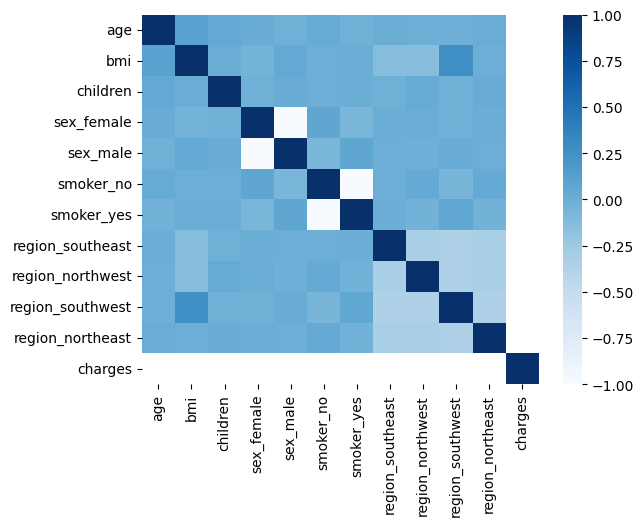

In [105]:
sns.heatmap(df_new.corr(), vmin=-1, vmax=1, cmap="Blues")

Importamos las librerias necesarias para realizar nuestro modelo de regresión lineal y entrenamos el modelo

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [107]:
# Viasualizamos el DataFrame final
df_new.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_southeast,region_northwest,region_southwest,region_northeast,charges
0,-0.833333,-0.297708,-0.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
1,-0.875000,0.401310,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN
2,-0.458333,0.309616,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN
3,-0.250000,-0.916344,-0.5,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN
4,-0.291667,-0.181006,-0.5,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN


In [108]:
# Revisamos las dimensiones de las variables de entrenamiento
X_scaled.shape, y.shape

((1338, 11), (1338, 1))

In [109]:
# Separamos la data de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, random_state=47, test_size = 0.33)

In [110]:
# Visualizamos las dimensiones de la data de entrenamiento y test para "y"
y_train.shape, y_test.shape

((896, 1), (442, 1))

In [111]:
# Visualizamos las dimensiones de la data de entrenamiento y test para "X"
X_train.shape, X_test.shape

((896, 11), (442, 11))

In [112]:
# Entrenamos el modelo
lmodel = LinearRegression()
lmodel.fit(X_train, y_train)

LinearRegression()

In [113]:
# Predecimos utilizando el modelo
y_pred = lmodel.predict(X_test)

In [114]:
from sklearn.metrics import r2_score

In [115]:
# calculo del R2
r2_score(y_test, y_pred)

0.7775766413046511

Utilizando regresion lineal en el modelo, obtenemos un R2 de 0.77. Es decir que el 77% de la varianza del target es explicada por las otras variables independientes.